In [1]:
import sys
sys.path.append("../lib/python3.7/site-packages/")

import matplotlib.pyplot as plt

In [92]:
def plot_values (x, y, title, ybot, ytop, savename=None):
    plt.figure(figsize=(15, 9))

    plt.plot(x, y)
    
#     plt.ylim(ybot, ytop)

    for a,b in zip(x, y):
        plt.annotate('(%s, %.6f)' % (a,b), xy=(a,b), textcoords='data')

    plt.title(title)

    plt.ylabel("cv_coherence")
    plt.xlabel("number of topics")
    if not savename:
        plt.show()
    else:
        plt.savefig(savename)

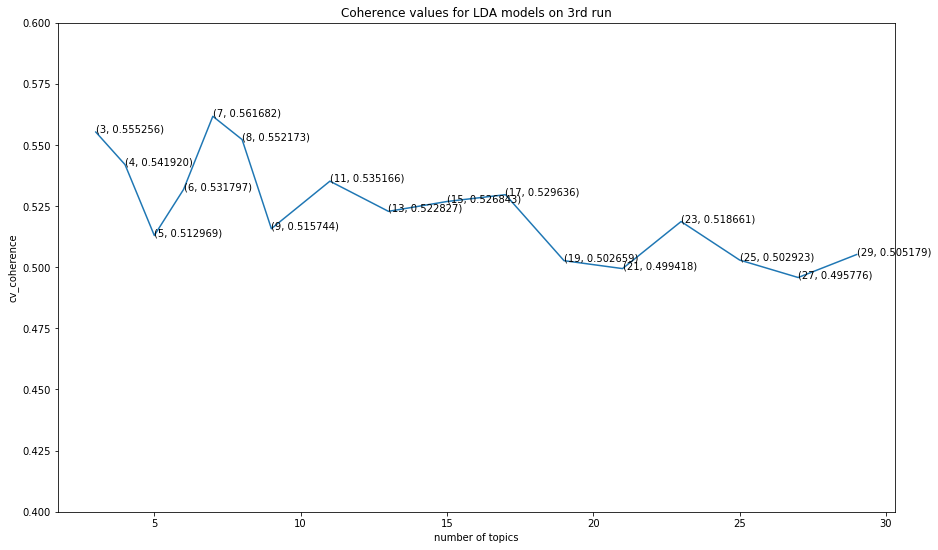

In [37]:
# Plot old LDA Coherence(cv) values
# run2: 11-29; run3: 3-8
old_y = list()
old_x = list()

# Read the inputs
with open("../data-out/run2lda_cv.txt", "r") as inf:
    for line in inf:
        line = line.strip('\n')
        old_y.append(float(line.split(" ")[1]))
        old_x.append(int(line.split(" ")[0]))
with open("../data-out/lda_cv_11_29.txt", "r") as inf:
    for line in inf:
        line = line.strip('\n')
        old_y.append(float(line.split(" ")[1]))
        old_x.append(int(line.split(" ")[0]))

# Set the title for this plot
title = 'Coherence values for LDA models on 3rd run'

plot_values(old_x, old_y, title, 0.40, 0.60, "lda-run3")

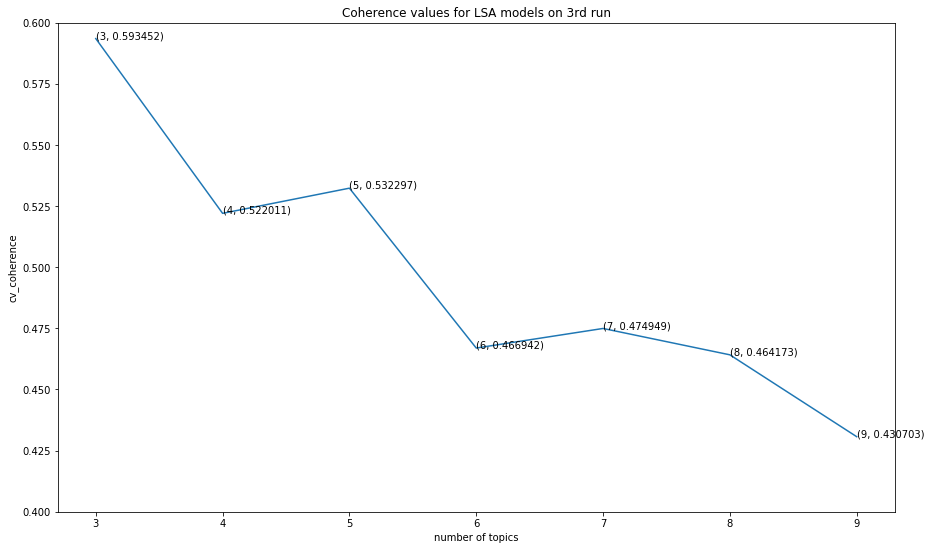

In [36]:
# Plot old LSA coherence values
# run3: 3-8
old_y = list()
old_x = list()

# Read the inputs
with open("../data-out/run2lsa_cv.txt", "r") as inf:
    for line in inf:
        line = line.strip('\n')
        old_y.append(float(line.split(" ")[1]))
        old_x.append(int(line.split(" ")[0]))

# Set the title for this plot
title = 'Coherence values for LSA models on 3rd run'

plot_values(old_x, old_y, title, 0.40, 0.60, "lsa-run3")

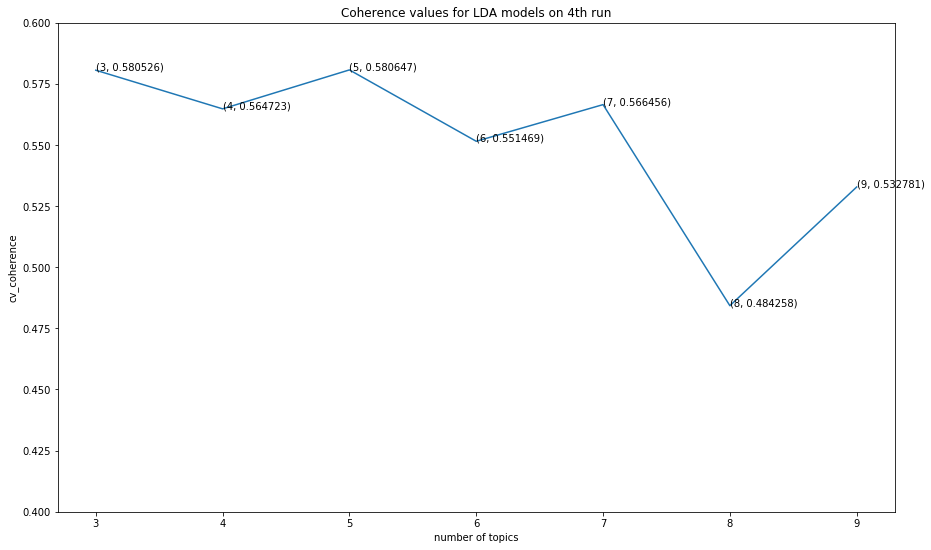

In [35]:
# Plot new LDA coherence values
# run4: 3-8
old_y = list()
old_x = list()

# Read the inputs
with open("../data-out/run3lda_cv.txt", "r") as inf:
    for line in inf:
        line = line.strip('\n')
        old_y.append(float(line.split(" ")[1]))
        old_x.append(int(line.split(" ")[0]))

# Set the title for this plot
title = 'Coherence values for LDA models on 4th run'

plot_values(old_x, old_y, title, 0.40, 0.60, "lda-run4")

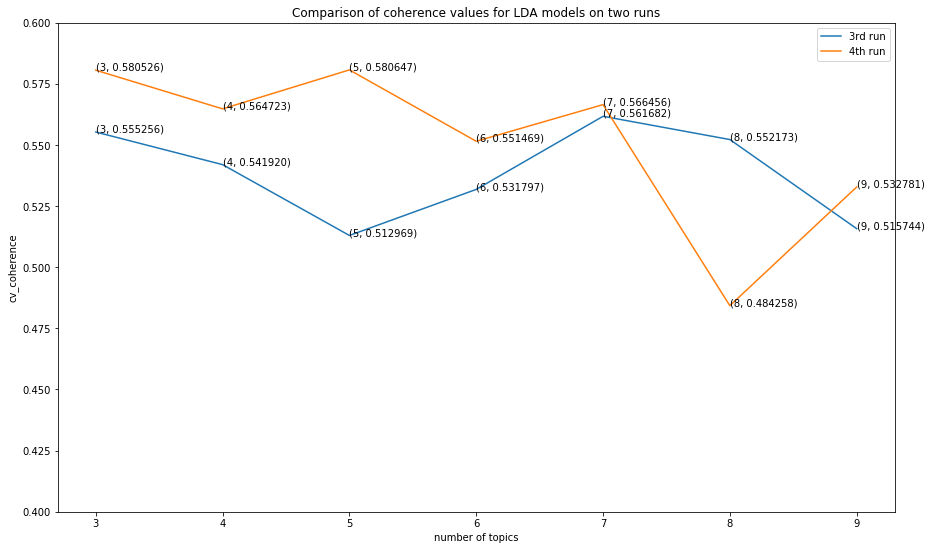

In [31]:
# Plot new LDA coherence values
# run4: 3-8
old_y = list()
old_x = list()
new_x = list()
new_y = list()

# Read the old inputs
with open("../data-out/run2lda_cv.txt", "r") as inf:
    for line in inf:
        line = line.strip('\n')
        old_y.append(float(line.split(" ")[1]))
        old_x.append(int(line.split(" ")[0]))

# Read the new inputs
with open("../data-out/run3lda_cv.txt", "r") as inf:
    for line in inf:
        line = line.strip('\n')
        new_y.append(float(line.split(" ")[1]))
        new_x.append(int(line.split(" ")[0]))

# Set the title for this plot
title = 'Comparison of coherence values for LDA models on two runs'

plt.figure(figsize=(15, 9))

plt.plot(old_x, old_y, label="3rd run")
plt.plot(new_x, new_y, label="4th run")

plt.ylim(0.40, 0.60)

for a,b in zip(old_x, old_y):
    plt.annotate('(%s, %.6f)' % (a,b), xy=(a,b), textcoords='data')

for a,b in zip(new_x, new_y):
    plt.annotate('(%s, %.6f)' % (a,b), xy=(a,b), textcoords='data')

plt.title(title)

plt.ylabel("cv_coherence")
plt.xlabel("number of topics")
plt.legend()
# plt.show()
plt.savefig('compare-lda34.png')

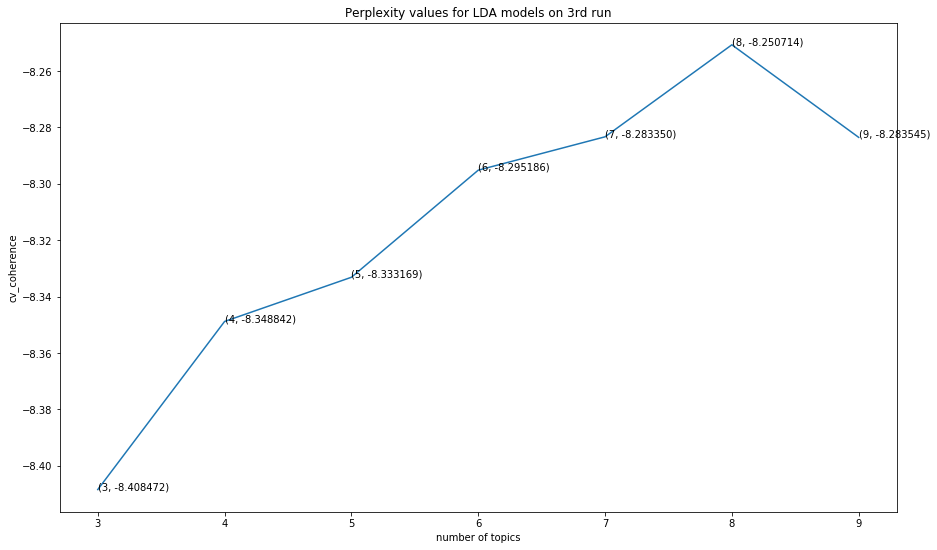

In [96]:
# Plot old LDA perplexity values
# run3: 3-8
old_y = list()
old_x = list()

# Read the inputs
with open("../data-out/run3lda_perplexity.txt", "r") as inf:
    for line in inf:
        line = line.strip('\n')
        old_y.append(float(line.split(" ")[1]))
        old_x.append(int(line.split(" ")[0]))

# Set the title for this plot
title = 'Perplexity values for LDA models on 3rd run'

plot_values(old_x, old_y, title, -8.45, -8.2)

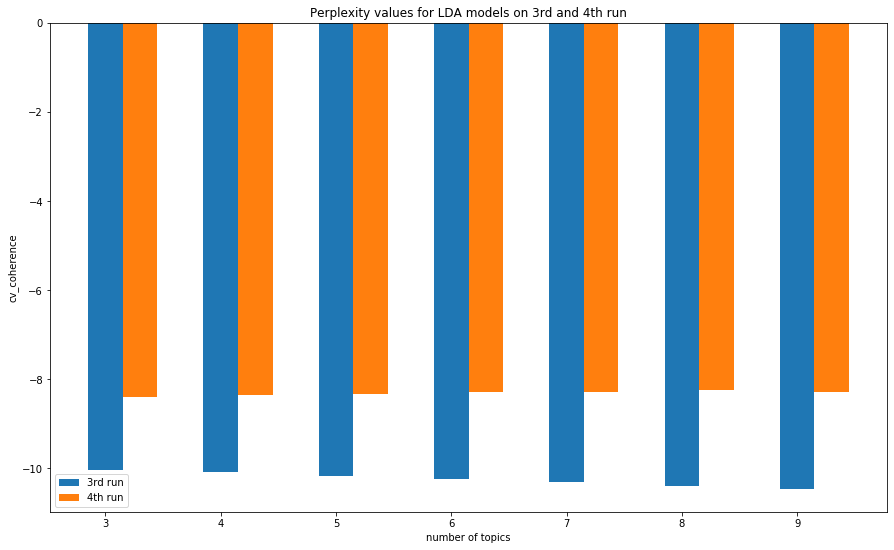

In [82]:
# Get old LDA perplexity values
# run3: 3-8
old_y = list()
old_x = list()

# Read the inputs
with open("../data-out/run2lda_perplexity.txt", "r") as inf:
    for line in inf:
        line = line.strip('\n')
        old_y.append(float(line.split(" ")[1]))
        old_x.append(int(line.split(" ")[0]))

# Get new LDA perplexity values
# run4: 3-8
new_y = list()
new_x = list()

# Read the inputs
with open("../data-out/run3lda_perplexity.txt", "r") as inf:
    for line in inf:
        line = line.strip('\n')
        new_y.append(float(line.split(" ")[1]))
        new_x.append(int(line.split(" ")[0]))

# Set the title for this plot
title = 'Perplexity values for LDA models on 3rd and 4th run'

# plot_values(old_x, old_y, title)
new_x = np.array(new_x)
w = 0.3
plt.figure(figsize=(15, 9))

ax = plt.subplot(111)
p1 = ax.bar(new_x, old_y, width=w, align='center', label='3rd run')
p2 = ax.bar(new_x+w, new_y, width=w, align='center', label='4th run')


# plt.autoscale(tight=True)

plt.title(title)
plt.ylabel("cv_coherence")
plt.xlabel("number of topics")
plt.legend()
plt.savefig('perplexities.png')



### Don't Run. ###

In [ ]:
## LDA Topic Visualisation
import numpy as np
from gensim.models.ldamodel import LdaModel
from gensim.corpora import Dictionary
import pyLDAvis

In [ ]:
def get_corpus(npy_filename):
  corpus = list()

  # save np.load
  np_load_old = np.load
  print("Changing numpy load param to allow pickle")

  # modify the default parameters of np.load
  np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

  print("Loading corpus as numpy array")
  temparray = np.load(npy_filename)
  print("Converting corpus numpy array to list")
  corpus = temparray.tolist()

  # restore np.load for future normal usage
  np.load = np_load_old

  return corpus

In [ ]:
%%time
workingdir = "gdrive/My Drive/iml/saved_gpu/"

dictionary = Dictionary.load(workingdir + "emails.dictionary")
corpus = get_corpus(workingdir + "corpus.npy")

model_name4 = workingdir + "lda4.model"
model_name5 = workingdir + "lda5.model"
lda_model4 = LdaModel.load(model_name4)
lda_model5 = LdaModel.load(model_name5)

In [ ]:
vis4 = pyLDAvis.gensim.prepare(lda_model4, corpus, dictionary=dictionary)
vis5 = pyLDAvis.gensim.prepare(lda_model5, corpus, dictionary=dictionary)

In [ ]:
pyLDAvis.save_html(vis4, workingdir+"lda4.html")
pyLDAvis.save_html(vis5, workingdir+"lda5.html")